In [1]:
import numpy as np

def lax_wend(c):
    dt = 0.04
    dx = 0.05
    nu = c*dt/dx

    # Max values of X and Y are 4
    n = int(10/dt)
    m = int(4/dx)

    X = np.linspace(-2, 2, m)
    T = np.linspace(-5, 5, n)

    U = np.zeros((m, n), dtype=np.float32)  # U at nth iteration
    # U at (n + 1)th iteration, yet to be calculated


    # Intializing U
    # u = 0; for x = 0; y = 0
    # u = x**2 along y = 4; 0< x < 4
    # u = 16*y along x = 4; 0 < y < 4
    # U[0:int(1/dx),0] = 0
    U[0:int(2/dx), 0] = X[0:int(2/dx)]+2
    U[int(2/dx):, 0] = 2 - X[int(2/dx):]

    for i in range(0, n-1):
        for j in range(0, m):
            U[j, i+1] = U[j,i] - nu*(U[(j+1)%m,i] - U[(j-1+m)%m, i])/2 + (nu**2)*(U[(j+1)%m, i] - 2*U[j,i] + U[(j-1+m)%m, i])/2

    return U

def upwind(c):
    dt = 0.04
    dx = 0.05
    nu = c*dt/dx

    # Max values of X and Y are 4
    n = int(10/dt)
    m = int(4/dx)

    X = np.linspace(-2, 2, m)
    T = np.linspace(-5, 5, n)

    U = np.zeros((m, n), dtype=np.float32)  # U at nth iteration
    # U at (n + 1)th iteration, yet to be calculated


    # Intializing U
    # u = 0; for x = 0; y = 0
    # u = x**2 along y = 4; 0< x < 4
    # u = 16*y along x = 4; 0 < y < 4
    # U[0:int(1/dx),0] = 0
    U[0:int(2/dx), 0] = X[0:int(2/dx)]+2
    U[int(2/dx):, 0] = 2 - X[int(2/dx):]

    for i in range(0, n-1):
        for j in range(0, m):
            U[j, i+1] = U[j,i] - nu*(U[j,i] - U[(j-1+m)%m, i])

    return U

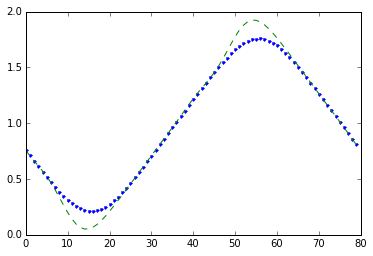

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
U1, U2 = upwind(1), lax_wend(1)
plt.plot(U1[:, 220], '.');plt.plot(U2[:, 220], '--')